In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

In [31]:
midterm = pd.read_csv('finalproj/alldata.csv')

In [32]:
midterm

,Unnamed: 0,City,TotalDays,PoorDays,AQIMedian,Zone,City.1,TotalDays.1,PoorDays.1,AQImedian,Zone.1
0,0,Seattle,365,3,41,west,Seattle,306,14,42,west
1,1,San Francisco,365,14,48,west,San Francisco,314,22,45,west
2,2,Los Angeles,365,115,77,west,Los Angeles,275,119,81,west
3,3,Denver,365,38,61,mountain,Denver,366,34,58,mountain
4,4,Salt Lake City,365,24,51,mountain,Salt Lake City,366,21,50,mountain
5,5,Phoenix,365,58,74,mountain,Phoenix,366,70,75,mountain
6,6,Chicago,365,43,71,central,Chicago,366,28,56,central
7,7,St. Louis,365,103,74,central,St. Louis,366,10,52,central
8,8,Dallas,365,28,52,central,Dallas,306,24,49,central
9,9,Boston,365,10,47,east,Boston,306,0,42,east


In [34]:
midterm['lon'] = [-122.33, -122.42, -118.24, -104.99, -111.89, -112.07, -87.63, -90.19, -96.80, -71.06, -77.04, -80.19]
midterm['lat'] = [47.61, 37.77, 34.05, 39.74, 40.76, 33.45, 41.88, 38.63, 32.78, 42.36, 38.91, 25.76]

In [35]:
midterm

,Unnamed: 0,City,TotalDays,PoorDays,AQIMedian,Zone,City.1,TotalDays.1,PoorDays.1,AQImedian,Zone.1,lon,lat
0,0,Seattle,365,3,41,west,Seattle,306,14,42,west,-122.33,47.61
1,1,San Francisco,365,14,48,west,San Francisco,314,22,45,west,-122.42,37.77
2,2,Los Angeles,365,115,77,west,Los Angeles,275,119,81,west,-118.24,34.05
3,3,Denver,365,38,61,mountain,Denver,366,34,58,mountain,-104.99,39.74
4,4,Salt Lake City,365,24,51,mountain,Salt Lake City,366,21,50,mountain,-111.89,40.76
5,5,Phoenix,365,58,74,mountain,Phoenix,366,70,75,mountain,-112.07,33.45
6,6,Chicago,365,43,71,central,Chicago,366,28,56,central,-87.63,41.88
7,7,St. Louis,365,103,74,central,St. Louis,366,10,52,central,-90.19,38.63
8,8,Dallas,365,28,52,central,Dallas,306,24,49,central,-96.80,32.78
9,9,Boston,365,10,47,east,Boston,306,0,42,east,-71.06,42.36


In [36]:
cities = gp.GeoDataFrame(midterm, geometry = gp.points_from_xy(midterm.lon, midterm.lat))
cities.geometry

0     POINT (-122.33000 47.61000)
1     POINT (-122.42000 37.77000)
2     POINT (-118.24000 34.05000)
3     POINT (-104.99000 39.74000)
4     POINT (-111.89000 40.76000)
5     POINT (-112.07000 33.45000)
6      POINT (-87.63000 41.88000)
7      POINT (-90.19000 38.63000)
8      POINT (-96.80000 32.78000)
9      POINT (-71.06000 42.36000)
10     POINT (-77.04000 38.91000)
11     POINT (-80.19000 25.76000)
Name: geometry, dtype: geometry

In [37]:
filepath = 'finalproj/states.shp'
states = gp.read_file(filepath)

In [38]:
states = states.to_crs("epsg:4326") #Mercator-projection

RuntimeError: b'no arguments in initialization list'

In [39]:
states.crs

{'proj': 'eqdc',
 'lat_0': 40,
 'lon_0': -96,
 'lat_1': 20,
 'lat_2': 60,
 'x_0': 0,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'm',
 'no_defs': True}

In [40]:
cities.crs

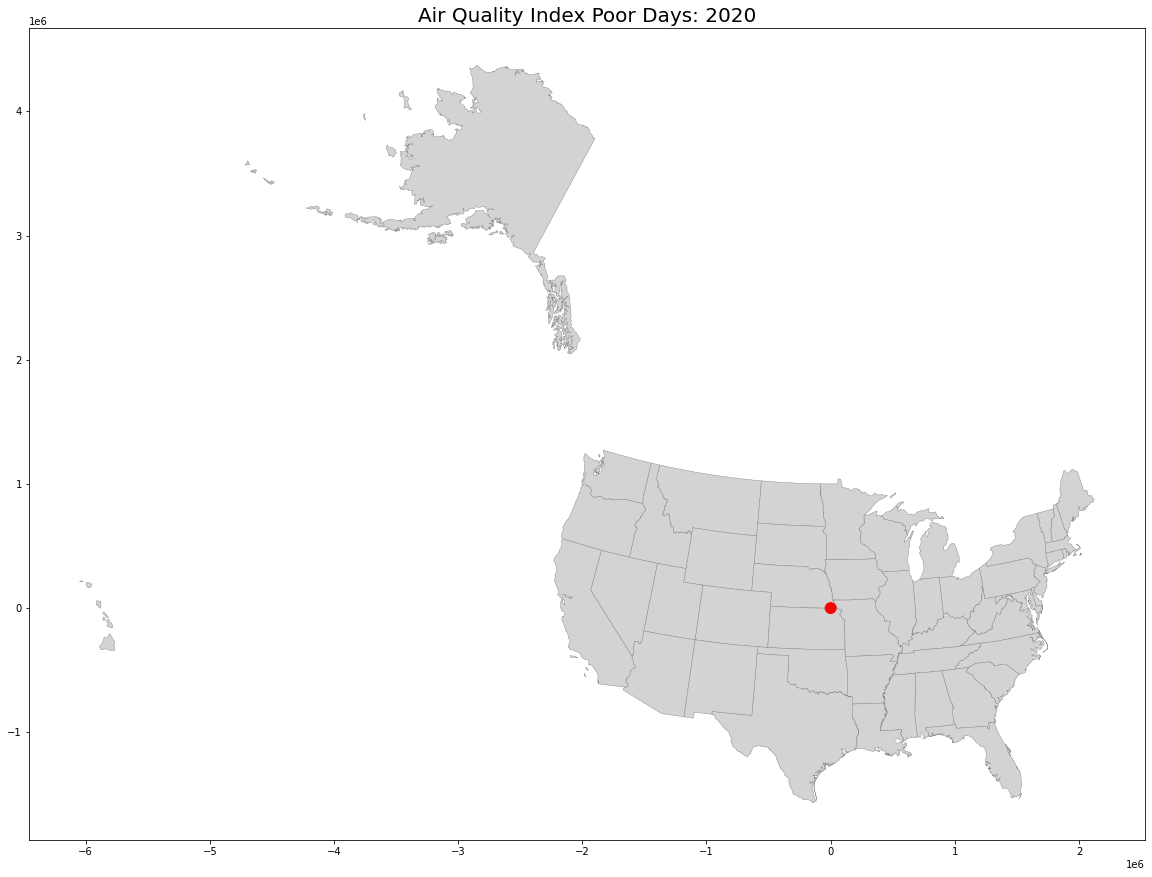

In [51]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend = True)
cities.plot(ax=ax,color='red', markersize='PoorDays.1', alpha=1.0, categorical=False, legend=True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2020', size=20)
plt.savefig('finalproj/alldata2020.png')
#plt.axis()
#plt.show()

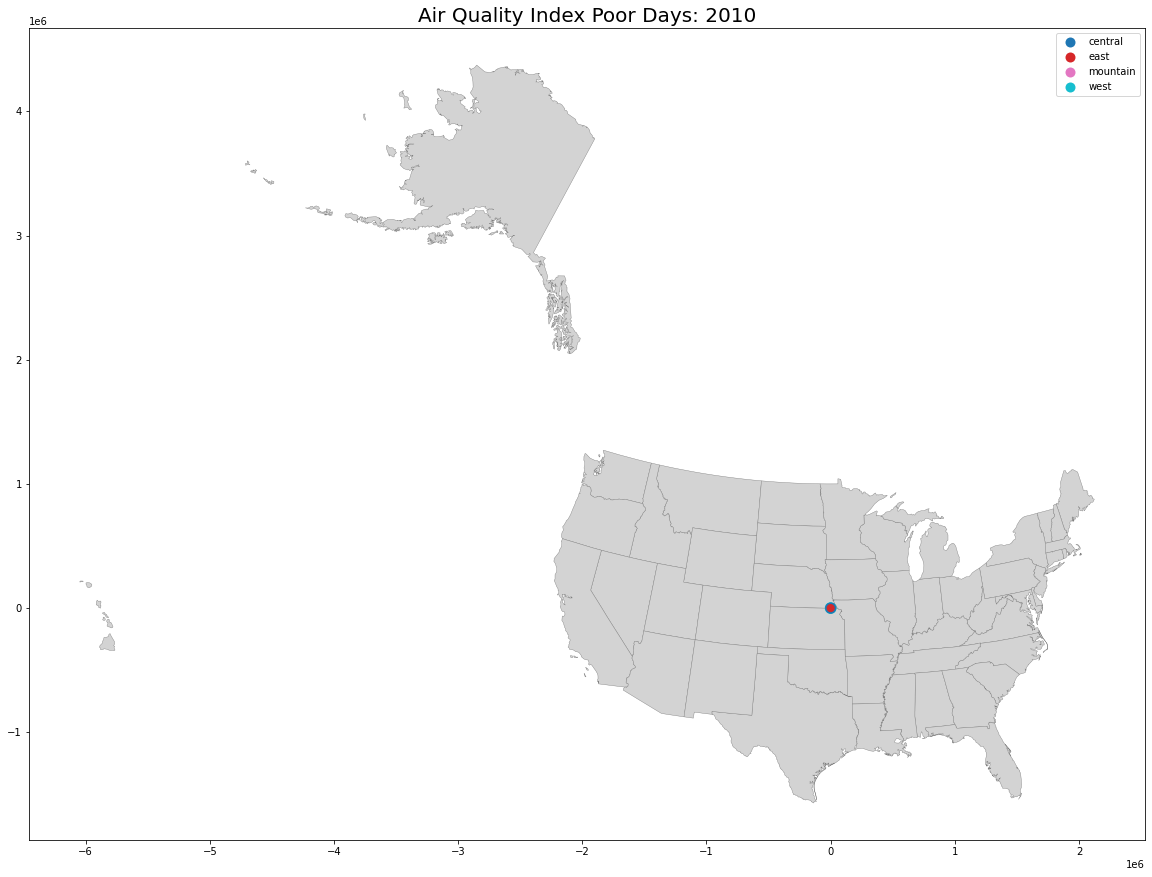

In [50]:
fig, ax = plt.subplots(figsize=(20,20))
states.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4, legend = True)
cities.plot(column = 'Zone', ax=ax, markersize='PoorDays', alpha=1.0, categorical=False, legend=True)
ax.axis()
plt.title('Air Quality Index Poor Days: 2010', size=20)
plt.savefig('finalproj/alldata2010.png')
#plt.axis()
#plt.show()

In [53]:
import folium

m = folium.Map(locations=[34,-120], titles="OpenStreetMap", zoom_start=4)
m

In [61]:
import folium
for i in range(0,len(cities)):
    folium.Circle(
        location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
        popup=cities.iloc[i]['City'],
        radius=float(cities.iloc[i]['PoorDays.1'])*2000,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)
m

In [64]:
m.save('finalproj/aqidata2020.html')

In [59]:
import folium

m = folium.Map(locations=[34,-120], titles="OpenStreetMap", zoom_start=4)
m

In [62]:
import folium
for i in range(0,len(cities)):
    folium.Circle(
        location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
        popup=cities.iloc[i]['City'],
        radius=float(cities.iloc[i]['PoorDays'])*2000,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)
m

In [63]:
m.save('finalproj/aqidata2010.html')